# Student Id: 1820345 

# Student Name : Fergus Mc Hale

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import sklearn.metrics as m

# Task 1
# Load bank.csv into a Pandas dataframe. Examine the first few data rows and the last few data rows. Identify an attribute that can be the target/dependable variable for 2-class classification.

In [2]:
CSV_SPLIT = ','

In [3]:
data = pd.read_csv('./data/bank_et1.csv',sep=CSV_SPLIT, delimiter=None)

In [4]:
del data['Unnamed: 0'] #Drop Column not relevent to dataset

# Task 2
# Follow the examples in the provided notebook “Lab 1 - Exploratory Data Analysis.ipynb” to perform EDA of the bank data set.

In [5]:
empty_data = data.isnull().sum() #Check for null values in field

# The following fields contain null values that have been replaced with values
# Job : 10
# Education : 104
# contact  : 191
# poutcome : 454
# These have been replaced to say unknown

In [6]:
data["poutcome"].fillna("unknown", inplace = True) #Replace null values

In [7]:
data["education"].fillna("unknown", inplace = True)

In [8]:
data["job"].fillna("unknown", inplace = True)

In [9]:
data["contact"].fillna("unknown", inplace = True)

# Calculate statistics for the numerical and categorical attributes.

In [10]:
data.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [11]:
data.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20,student,single,unknown,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,unknown,yes
1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,unknown,yes
1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,unknown,yes
1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,unknown,20,sep,185,1,-1,0,unknown,yes
1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,unknown,yes


In [12]:
data.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


# The age range is between 18 and 93 with the minimum age being 18
# The balance is can range from minus 980 to 8k with the minimum balance being in the negative
# A campaign can range in duration of between 1 and 11 days with the mimimum day of being one
# The payment days can be behind one day or max be 854 days with the mimimum of being a day behind in payment
# The duration can be between 7 days and 1,823 days

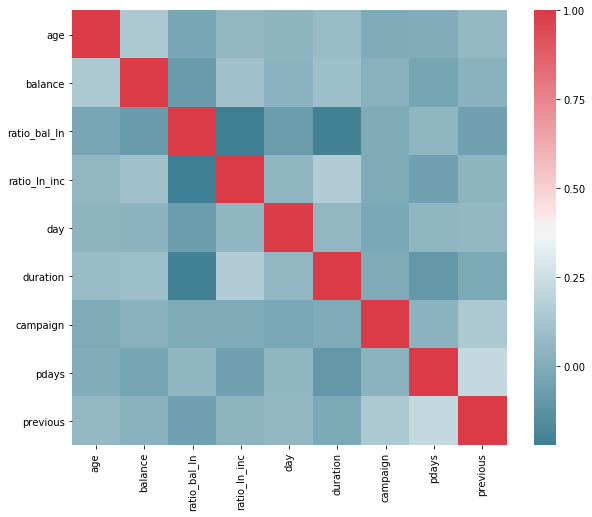

In [13]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Text(0, 0.5, 'Count')

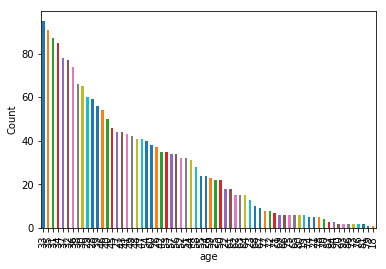

In [14]:
data['age'].value_counts().plot(kind='bar')
plt.xlabel('age')
plt.ylabel('Count')

# The age of the group is slightly biased in that there isnt an even spread across the age groups.

In [15]:
data[data['balance'] >- 500].describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,41.740704,1424.144724,0.240121,0.487153,13.843719,292.495477,1.908543,168.048744,2.569849
std,12.742730,3135.568150,0.821794,1.075765,9.703093,221.862237,1.379909,131.812149,3.406718
min,18.000000,-498.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,205.000000,-0.310584,-0.272734,5.000000,147.000000,1.000000,77.000000,1.000000
50%,38.000000,556.000000,0.220098,0.492199,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1646.000000,0.804624,1.215000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


# There are 86 people who dont have a balance within their account
# 9 individuals only have a balance of 1 in their account.
# 5 individuals only have a balance of 5 in their account with 6 individuals only having a balance of 4 in their account
# The balance is slighly skewed to going upwards from 100

Text(0, 0.5, 'Count')

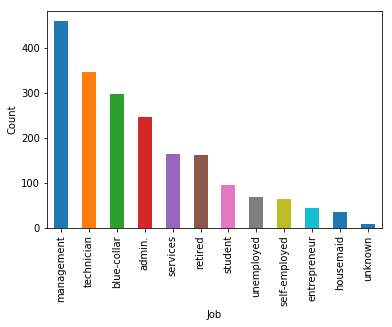

In [16]:
data['job'].value_counts().plot(kind='bar')
plt.xlabel('Job')
plt.ylabel('Count')

# A large proporation of population are in management, technical or blue collar jobs explaining that their balance is slightly higher compared to assumed lower income groups

Text(0, 0.5, 'Count')

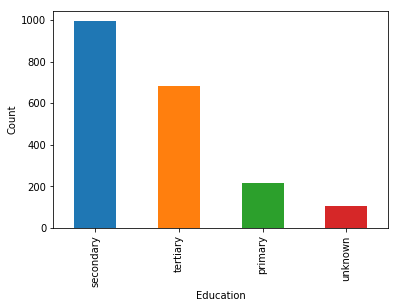

In [17]:
data['education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')

# A large proportion of the population have received secondary education with a 1/3 of the cohort from secondary not considering to go onto third level education

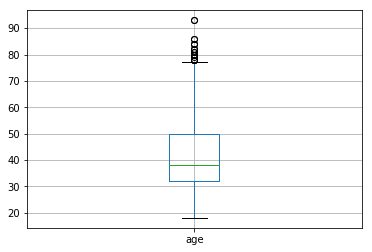

In [18]:
data.boxplot(column='age')

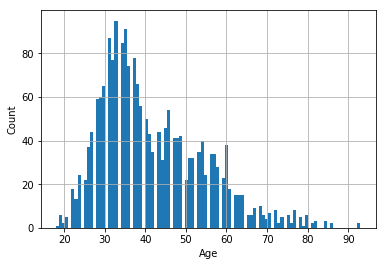

In [19]:
data['age'].hist(bins=99)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [20]:
data['subscribed'] = data['subscribed'].map({'yes': 1, 'no': 0})

Text(0.5, 0.98, 'Number of individuals that subscribed of a given age')

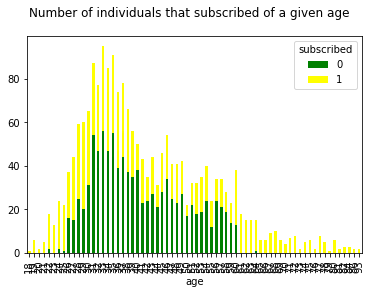

In [21]:
age_default = pd.crosstab(data['age'], data['subscribed'])
age_default.plot(kind='bar', stacked=True, color=['green', 'yellow'])
plt.suptitle('Number of individuals that subscribed of a given age')

In [22]:
data['default'] = data['default'].map({'yes': 1, 'no': 0})

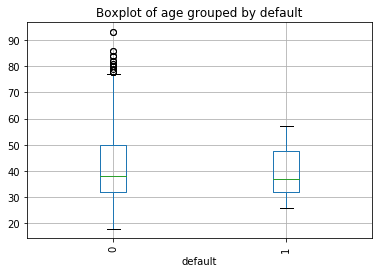

In [23]:
data.boxplot(column='age', by='default')
plt.title('Boxplot of age grouped by default')
plt.xticks(rotation=90)
plt.suptitle("")
plt.show()

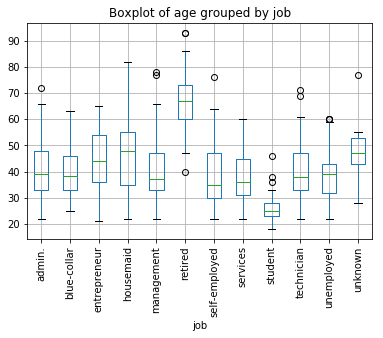

In [24]:
data.boxplot(column='age', by='job')
plt.title('Boxplot of age grouped by job')
plt.xticks(rotation=90)
plt.suptitle("")
plt.show()

# A large proporation of the population are in between 32 and 50. This is biased based on age not including an even distribution across the 60,70,80,90 range

# The dataset varies with one individual in the 80's range having a balance of ~80K to a individual in the 95 range having a balance of 0. In between there are 2 individuals between the ranges 70 - 80 having a balance of ~25k.
# There is 1 individual between  50 - 60 having a similar balance of ~25k.
# There is 1 individual of age of 49 having 20k
# There is 1 individual having a ~45 having 30k
# There is 1 individual age of (~32,~42) having a balance of ~25 - ~28k
# There is a small number of samples in 70,80,90 range which is concerning as not an evenly distributed dataset based on age. There is some outliners in the dataset particularly with the one individual inhis 80's having a large balance

# There is a large numbers employed in technical/ Management level
# The Job Range is 
# Adminstrators are between ~32 and ~48 with median of ~39
# blue collar workers are between ~33 and ~45 with median a year or two behind admins
# entrpreneurs are between ~36 and ~55 with median between ~45
# housemaids are between ~35 and ~55 with median of 48
# managment are between ~33 and ~48 with median of 34
# retired are between ~60 and ~73 with median of 66
# self employed are between ~30 and ~48 with median of ~34
# services are between ~31 and 44 median of 35
# students are between ~25 and ~29 with median of ~25

Text(0, 0.5, 'Count')

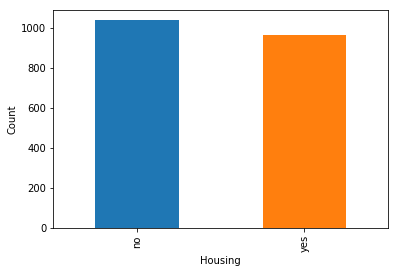

In [25]:
data['housing'].value_counts().plot(kind='bar')
plt.xlabel('Housing')
plt.ylabel('Count')

# There is a greater spead of individuals who do have housing compared to those who do.

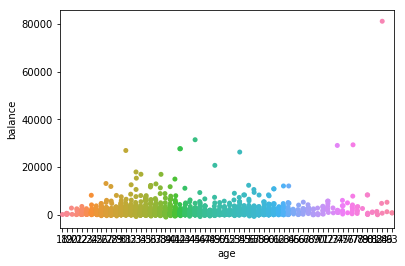

In [26]:
sns.stripplot(x=data['age'],y=data['balance'],jitter=True)

# Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).

C:\Users\fergu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


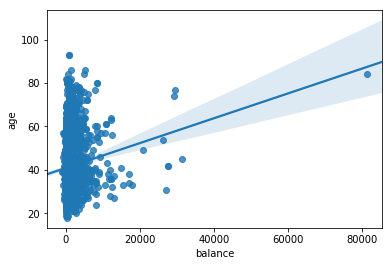

In [27]:
sns.regplot(y='age', x='balance', data=data)

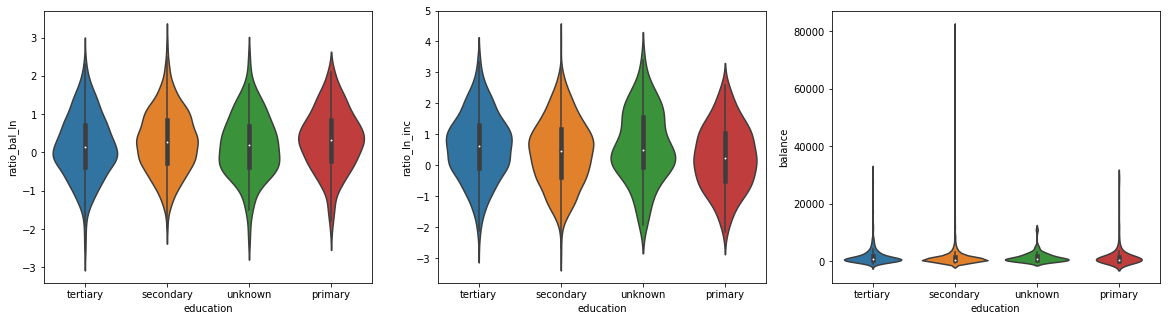

In [28]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.violinplot(x='education', y='ratio_bal_ln',data=data, ax=axs[0])
sns.violinplot(x='education', y='ratio_ln_inc',data=data, ax=axs[1])
sns.violinplot(x='education', y='balance', data=data, ax=axs[2])
plt.show()

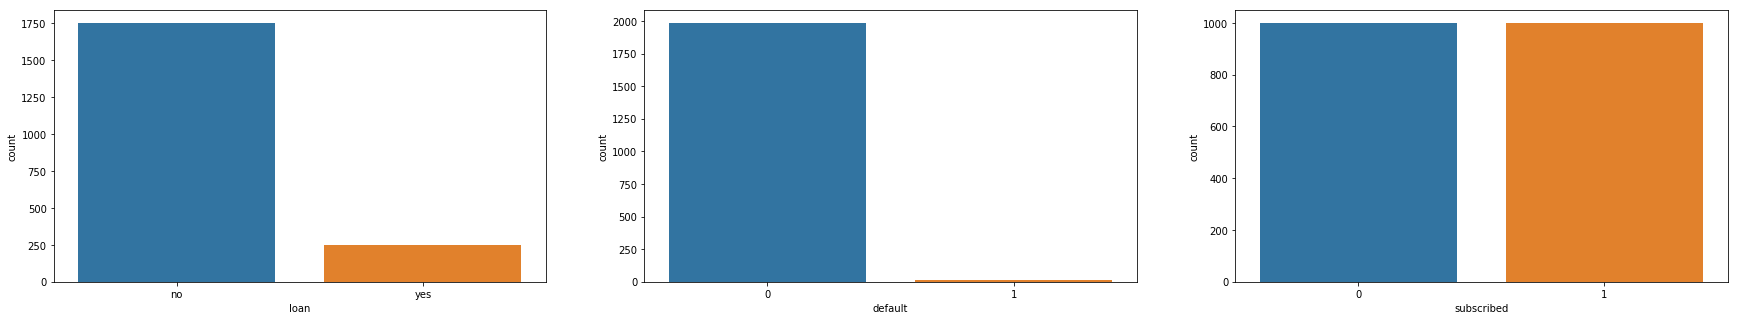

In [29]:
fig, axs = plt.subplots(ncols=3,figsize=(30,5))
sns.countplot(x='loan', data=data, ax=axs[0])
sns.countplot(x='default', data=data, ax=axs[1])
sns.countplot(x='subscribed', data=data, ax=axs[2])
plt.show()

# Generate additional plots to identify two numerical attributes that can potentially be used for predicting the value of the dependent variable you chose in Task 1.

# There is no strong correlation between the columns.
# There is only low correlation between age, balance with a stronger correlation between ratio_bal_in and subscribed


# You won't find two numerical attributes that will perfectly classify a dependent variable. Pick the best you can find.

# Task 3
# Consider the two numerical attributes picked in Task 2 and describe (in a markdown cell) how a perceptron can be used to perform 2-class classification. Use the following terms in your description:

* X = Rd (Input space) This is the 
* Output space Y
* Unknown target function f : X -> Y
* Data set (historical records of bank) data
* Hypothesis set H (Set of Candidate Formulas)
* Final Hypothesis g = f 
* In-sample error Ein(g)
* Out-of-sample error Eout(g)

# PT[Ein(h) - Eout(h)] |> e] <= 2e-2e^2N

# A Client gives you historical records  from a bank through which we want to extract two key features [‘Age’,’Balance’] input space X in order to allow us to predict whether or not a customer will default on a loan [‘default’] output space Y. 

# This will be one of the KPI’s the bank uses before deciding who or who should not be allowed to receive a loan. This is the unknown target function f: X->Y this links X to Y. 

# The Perceptron Learning Algorithm (PLA) is used to identify the final hypothesis with the hypothesis set. The in sample error and out sample error is used to then measured within the Hoeffding bound to determine whether or not learning is possible with the dataset.

# Task 4

![The Learning Diagram]( .\images\LearningDiagramplusnoise.jpg "The Learning Diagram")

In [30]:
# H Set of Candidate Formulas
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [31]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors

In [32]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights,x_min), point_on_boundary(weights,x_max)]

In [33]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [34]:
# A Algorithm
def pla(training_in, training_out,weights):
    bias = np.array([1])
    iterations=0
    while True:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        if (errors == 0):
            break
        
    return weights, iterations

In [35]:
def print__(X, y,weights,isboundary):
    if isboundary:
        y_bound = np.zeros([2])
        X_bound = np.zeros([2])
    
   
        X_bound[0] = X[:,0].min()
        X_bound[1] = X[:,0].max()

        y_bound[0], y_bound[1] = decision_boundary(weights, X_bound[0], X_bound[1])
    
    colors = ['yellow' if yy == 1 else 'orange' for yy in y] 
    plt.rcParams["figure.figsize"] = (10, 5) 
    plt.title("")
    plt.scatter(X[:,0], X[:,1], color=colors) 
    if isboundary:
        plt.plot(X_bound, y_bound, linestyle='dashed', color='black')
    
    plt.show() 

# Run the provided perceptron learning algorithm (PLA) on the dataset provided in the notebook. Take note of the number of iterations that were required to come to the final hypothesis and the final error. 

In [36]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
y = [yy if yy == 1 else -1 for yy in y] 

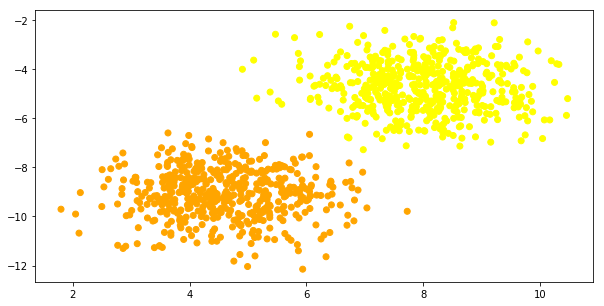

In [37]:
print__(X,y,0,False)

In [38]:
def run(X,y,w):
    (w,iteration_n) = pla(X,y,w)
    print__(X,y,w,True)

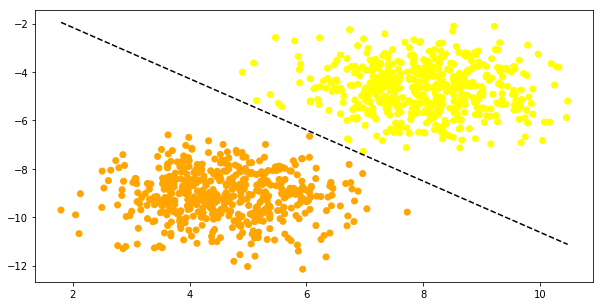

In [39]:
run(X,y,np.array([0,-4,4]))

In [40]:
calc_error(X, y,np.array([0,-4,4]))

500

In [41]:
Xd1 = data[['ratio_bal_ln', 'ratio_ln_inc']].values
yd1_labels = data[['subscribed']].values
yd1 = [1 if yy == 'yes' else -1 for yy in yd1_labels] 

C:\Users\fergu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


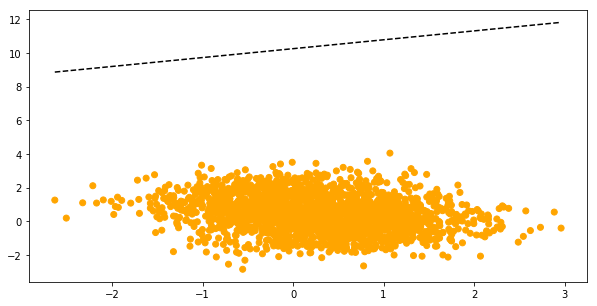

In [42]:
run(Xd1,yd1,np.array([1,2,3]))

# Test using variables that have a stronger correlation

In [43]:
Xd2 = data[['age', 'balance']].values
yd2_labels = data[['default']].values
yd2 = [1 if yy == 'yes' else -1 for yy in yd2_labels] 

C:\Users\fergu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


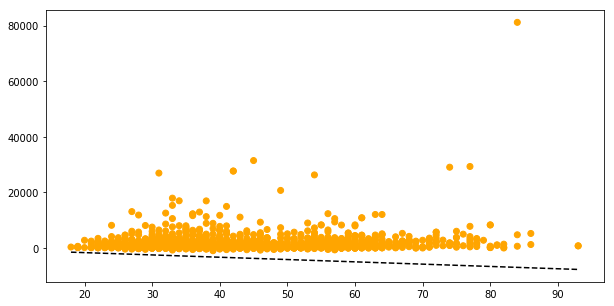

In [44]:
run(Xd2,yd2,np.array([1,4,6]))

# Test using variables that dont have any strong correlation

# Once you are satisfied you understand these results, run the PLA algorithm on the dataset you have explored in the previous tasks (using the selected dependent variable and the two most promising numerical attributes/features). If results are unsatisfactory (if you don't get results at all, why would this be?), investigate how the PLA algorithm can be changed to improve the performance. Change the provided algorithm accordingly and plot estimates for P[Ein-Eout|>e]. Exercise 1.10 (see Python code below in the Resources section) gives an example of how you can create such plots. In the same plot add the Hoeffding Bound  and conclude whether or not the found results obey the Hoeffding Equation (in a markdown cell). Draw conclusions on whether or not you have found proof that learning is possible (in a markdown cell).

> *"Pocket Algorithm : Take the best result and put in 'pocket' keep the best solution. when you get a better one throw it and keep new one. NOTE: PLA but just has memory"*

In [45]:
def pocket(training_in, training_out, weights):
    bias = np.array([1])
    iterations = 0
    best_iteration = 0
    best_weight = 0
    max_iterations = len(training_in)
    previous_error = 0
    
    while iterations < max_iterations:
        errors = 0;
        for x,y in zip(training_in, training_out):
            hypothesis = h(x,weights)
            
            if (hypothesis != y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
                
            
            
                #set weights
                best_weights = weights
                best_iteration = current_iteration
                
            if iterations == 0:
                continue
            
            if iterations == max_iterations:
                break
                
            if (errors == 0):
                break
                
    return best_weight , best_iteration

#### References
* [1] [Implementing PLA] (https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/)
* [2] [Reference Slides] (http://www.cs.rpi.edu/~magdon/courses/LFD-Slides/SlidesLect02.pdf)
* [3] [PLA Algorithm] (http://www.insightsbot.com/blog/C8Fm4/perceptron-algorithm-part-2-python-code-machine-learning-101)
* [4] [Scikitlearn Reference] (https://www.youtube.com/watch?v=oLane_Vh3CU)
* [5] [Logistic Regression] (https://datascienceplus.com/building-a-logistic-regression-in-python-step-by-step/)
* [6] [Perceptron Reference] (https://www.jilp.org/cbp/Daniel-slides.PDF)

[Muselli, M. (1997) On convergence properties of pocket algorithm. Neural Networks, IEEE Transactions on. [Online] 8 (3), 623–629.]